# Mid-Term Exam

## Intro:

A naive model for a pendulum, experiencing only gravity and friction is given by
the differential equation
$$ \theta'' + a\theta' + b\sin(\theta) = 0$$
with $a \geq 0, b > 0$ constant. The model is dimensionless, and physical values for an actual problem would appear in the constants $a$ and $b$.

Considering $\theta'$ as a new variable we can turn this into a first-order ODE
$$\pmatrix{\theta \cr \theta'}' = \pmatrix{ \theta' \cr -a\theta' -b\sin\theta}$$

## Part 0:  
Create a new directory in your personal repo called `midterm-exam`. Copy this notebook from the course repo into that directory. Do the solution inside this copied notebook. Add the entire directory to your personal git repo and push the solution back to your bitbucket remote. To be sure it will work set this up in the beginning and consider pushing intermediate results.


## Part 1

Write a function that takes as input:

- An interval `I` that represents the dimensionless time interval, implemented as a 2-element array.
- The number of divisions `n` of the interval `I`.
- The initial value of θ
- The initial value of θ'
    
   The function should return an array `[T, thA, thpA]` where:
   
   - `T` is an array that represents dimensionless time steps and consists of `n` regularly spaced points in `I`
   - `thA` is an array consists of the approximate values of $\theta$ at the times of `T`.
   - `thpA` is an array consists of the approximate values of $\theta'$ at the times of `T`. 

Use Eulers method to construct `thA` and `thpA`, i.e.:

$$\theta(t + \Delta t ) \simeq \theta(t) + \Delta t \theta'(t)$$
$$\theta'(t+\Delta t) \simeq \theta'(t) + \Delta t \theta''(t).$$

i.e. $thA[i+1] = thA[i] + \Delta t * thpA[i]$, etc. 

In [62]:
def part_1(I, n, theta, theta_prime):
    """
    Returns a 3-array of [T, thA, thpA] which models the movement of a pendulum.
    
    Params:
        I - An interval I that represents the dimensionless time interval, implemented as a 2-element array.
        n - The number of divisions n of the interval I. Should not be 0.
        theta - The initial value of θ
        theta_prime - The initial value of θ'
    """
    if n == 0:
        raise ValueError("n should not be 0")
    
    import numpy
    interval = numpy.linspace(I[0], I[1], n)
    #step_size = (I[1] - I[0]) / n # Nah... This is one.
    
    thA = [theta]
    thpA = [theta_prime]
    # Ignore the first step since we have initial value.
    for step in range(0, len(interval[1:])):
        thA.append(thA[step-1] + (1 * thpA[step-1]))
        # Naively calculate the second derivative.
        theta_prime_prime = - (1*thpA[step-1]) - (1*sin(thA[step-1]))
        thpA.append(thpA[step-1] + (1 * theta_prime_prime)) # possibly wrong.
    return [interval, numpy.array(thA), numpy.array(thpA)]

part_1([0, 100], 5, 1., 2.)

[array([   0.,   25.,   50.,   75.,  100.]),
 array([ 1.        ,  3.        ,  3.        ,  2.85887999,  2.15852902]),
 array([ 2.        , -0.14112001, -0.84147098, -0.14112001, -0.14112001])]

## Part 2

Sketch a few of your solutions $(t,y)$ for various step sizes, `n=10`, `n=50`, `n=200` with 
initial conditions:

$$ a = 1, \ \ \ b=1, \ \ \ \theta(0) = 0, \ \ \ \theta'(0) = 10. $$


Populating the interactive namespace from numpy and matplotlib


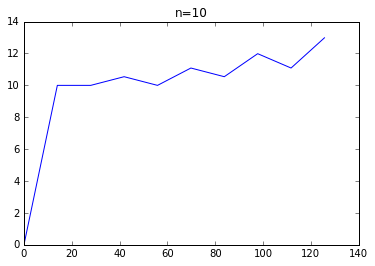

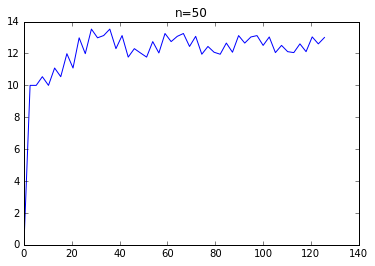

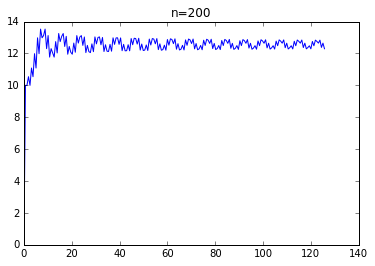

In [60]:
%pylab inline

figure()
title("n=10")
T, thA, thpA = part_1([0, 2*pi*20], 10, 0, 10)
plot(T, thA)

figure()
title("n=50")
T, thA, thpA = part_1([0, 2*pi*20], 50, 0, 10)
plot(T, thA)

figure()
title("n=200")
T, thA, thpA = part_1([0, 2*pi*20], 200, 0, 10)
plot(T, thA)

## Part 3

Your solution will converge asymptotically to $\theta = 2\pi k$ for some integer $k$, i.e. the pendulum will eventually come to rest after possibly revolving $k$ times.  Make sure your numerical solution is accurate enough so that the Euler-approximation to your differential equation can predict what $k$ is for the initial conditions in part 2. 

In [61]:
# There are no outcomes to this question. In theory we could just say "Okay we did it"? Trying anyways...

def part_3(I, n, theta, theta_prime):
    """
    Returns the integer k which the solution from part_1 converges too.
    
    Params:
        I - An interval I that represents the dimensionless time interval, implemented as a 2-element array.
        n - The number of divisions n of the interval I. Should not be 0.
        theta - The initial value of θ
        theta_prime - The initial value of θ'
    """
    import numpy
    T, thA, thpA = part_1(I, n, theta, theta_prime)
    # Fix up any imprecisions with round.
    k = int(numpy.round(thA[-1] / (2*pi)))
    return k

print(part_3([0, 2*pi*20], 10, 0, 10))

print(part_3([0, 2*pi*20], 50, 0, 10))

print(part_3([0, 2*pi*20], 200, 0, 10))

2
2
2
